In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/train_data.csv
/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/test_data.csv


# IMPORT DATASET

In [74]:
df_train = pd.read_csv(r"/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/train_data.csv")

df_test= pd.read_csv(r"/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/test_data.csv")

# IMPORTING LIBRARIES

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df_train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [77]:
df_test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


# Data Analysis

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [79]:
# Checking for unique values
df_train.nunique()

tracking_id                       28200
datetime                          28200
wind_speed(m/s)                   27727
atmospheric_temperature(°C)       20809
shaft_temperature(°C)             27625
blades_angle(°)                   22830
gearbox_temperature(°C)           27911
engine_temperature(°C)            28188
motor_torque(N-m)                 27660
generator_temperature(°C)         28187
atmospheric_pressure(Pascal)      25492
area_temperature(°C)              28170
windmill_body_temperature(°C)     21893
wind_direction(°)                 22984
resistance(ohm)                   27365
rotor_torque(N-m)                 25945
turbine_status                       14
cloud_level                           3
blade_length(m)                   22833
blade_breadth(m)                  28200
windmill_height(m)                27657
windmill_generated_power(kW/h)    27988
dtype: int64

In [80]:
# Checking for unique values
df_test.nunique()

tracking_id                      12086
datetime                         12086
wind_speed(m/s)                  11875
atmospheric_temperature(°C)       8988
shaft_temperature(°C)            11839
blades_angle(°)                   9820
gearbox_temperature(°C)          11952
engine_temperature(°C)           12081
motor_torque(N-m)                11856
generator_temperature(°C)        12081
atmospheric_pressure(Pascal)     10935
area_temperature(°C)             12075
windmill_body_temperature(°C)     9459
wind_direction(°)                 9885
resistance(ohm)                  11727
rotor_torque(N-m)                11128
turbine_status                      14
cloud_level                          3
blade_length(m)                   9849
blade_breadth(m)                 12086
windmill_height(m)               11831
dtype: int64

In [81]:
# Checking for missing values
df_train.isna().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [82]:
# Checking for missing values
df_test.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [83]:
df_train.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
wind_speed(m/s),1.000000,0.052363,0.038500,-0.003593,0.016240,0.154659,0.377897,0.427604,-0.121641,0.198772,0.028000,0.045681,0.236767,0.152735,0.006996,0.003903,-0.011933,0.062754
atmospheric_temperature(°C),0.052363,1.000000,0.011944,0.007429,0.005955,0.050748,0.095394,0.117335,-0.023382,0.073553,0.008472,0.018082,0.061556,0.044131,0.000567,0.003729,0.001270,-0.001005
shaft_temperature(°C),0.038500,0.011944,1.000000,-0.009692,0.029967,0.204034,0.071366,0.074695,-0.018744,0.087570,0.018121,0.020066,0.032219,0.027989,0.000145,-0.006120,-0.008823,0.046552
blades_angle(°),-0.003593,0.007429,-0.009692,1.000000,-0.025215,-0.064848,-0.138646,-0.044344,0.009316,-0.076014,0.003258,-0.027141,-0.033415,-0.048541,-0.009242,-0.061279,0.002717,-0.154808
gearbox_temperature(°C),0.016240,0.005955,0.029967,-0.025215,1.000000,0.132756,0.045057,0.045125,-0.008589,0.058875,0.017249,0.029088,0.021098,0.016662,-0.002677,0.011283,0.003853,0.053192
engine_temperature(°C),0.154659,0.050748,0.204034,-0.064848,0.132756,1.000000,0.352509,0.360616,-0.061328,0.342259,0.089745,0.137448,0.208365,0.138721,-0.007294,0.011560,-0.011952,0.272597
motor_torque(N-m),0.377897,0.095394,0.071366,-0.138646,0.045057,0.352509,1.000000,0.934950,-0.215039,0.475887,0.028134,0.212269,0.513372,0.390499,0.005023,0.052973,0.001177,0.505553
generator_temperature(°C),0.427604,0.117335,0.074695,-0.044344,0.045125,0.360616,0.934950,1.000000,-0.238989,0.517243,0.036341,0.212498,0.539554,0.371918,0.005362,0.017573,-0.000638,0.391820
atmospheric_pressure(Pascal),-0.121641,-0.023382,-0.018744,0.009316,-0.008589,-0.061328,-0.215039,-0.238989,1.000000,-0.091428,-0.009015,-0.028435,-0.128475,-0.093835,0.005462,0.005022,0.002784,-0.013310
area_temperature(°C),0.198772,0.073553,0.087570,-0.076014,0.058875,0.342259,0.475887,0.517243,-0.091428,1.000000,0.050754,0.200037,0.266673,0.187335,0.000074,0.022397,-0.005301,0.384564


# Checking Correlation

In [84]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
wind_speed(m/s),1.000000,0.052363,0.038500,-0.003593,0.016240,0.154659,0.377897,0.427604,-0.121641,0.198772,0.028000,0.045681,0.236767,0.152735,0.006996,0.003903,-0.011933,0.062754
atmospheric_temperature(°C),0.052363,1.000000,0.011944,0.007429,0.005955,0.050748,0.095394,0.117335,-0.023382,0.073553,0.008472,0.018082,0.061556,0.044131,0.000567,0.003729,0.001270,-0.001005
shaft_temperature(°C),0.038500,0.011944,1.000000,-0.009692,0.029967,0.204034,0.071366,0.074695,-0.018744,0.087570,0.018121,0.020066,0.032219,0.027989,0.000145,-0.006120,-0.008823,0.046552
blades_angle(°),-0.003593,0.007429,-0.009692,1.000000,-0.025215,-0.064848,-0.138646,-0.044344,0.009316,-0.076014,0.003258,-0.027141,-0.033415,-0.048541,-0.009242,-0.061279,0.002717,-0.154808
gearbox_temperature(°C),0.016240,0.005955,0.029967,-0.025215,1.000000,0.132756,0.045057,0.045125,-0.008589,0.058875,0.017249,0.029088,0.021098,0.016662,-0.002677,0.011283,0.003853,0.053192
engine_temperature(°C),0.154659,0.050748,0.204034,-0.064848,0.132756,1.000000,0.352509,0.360616,-0.061328,0.342259,0.089745,0.137448,0.208365,0.138721,-0.007294,0.011560,-0.011952,0.272597
motor_torque(N-m),0.377897,0.095394,0.071366,-0.138646,0.045057,0.352509,1.000000,0.934950,-0.215039,0.475887,0.028134,0.212269,0.513372,0.390499,0.005023,0.052973,0.001177,0.505553
generator_temperature(°C),0.427604,0.117335,0.074695,-0.044344,0.045125,0.360616,0.934950,1.000000,-0.238989,0.517243,0.036341,0.212498,0.539554,0.371918,0.005362,0.017573,-0.000638,0.391820
atmospheric_pressure(Pascal),-0.121641,-0.023382,-0.018744,0.009316,-0.008589,-0.061328,-0.215039,-0.238989,1.000000,-0.091428,-0.009015,-0.028435,-0.128475,-0.093835,0.005462,0.005022,0.002784,-0.013310
area_temperature(°C),0.198772,0.073553,0.087570,-0.076014,0.058875,0.342259,0.475887,0.517243,-0.091428,1.000000,0.050754,0.200037,0.266673,0.187335,0.000074,0.022397,-0.005301,0.384564


As we can see above, features "motor_torque(N-m)" and "generator_temperature(°C)" are highly correlated and therefore we need to retain only one of them.

In [85]:
# SPLITTING NUMERICAL AND CATEGORICAL FEATURES OF THE TRAIN DATASET
def splitFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [86]:
numerical_features,categorical_features=splitFeatures(df_train)

In [87]:
numerical_features

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,5.966275
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,14.851089
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,44.242269,536.153413,1980.861921,45.909054,2.774335,0.418299,24.590801,9.587934
28196,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,43.616412,354.239825,1712.840457,36.974913,-3.250989,0.461531,26.051604,4.522195
28197,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,43.576510,534.209913,1951.728713,88.319152,NaN,0.380264,28.533850,11.096599
28198,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,44.973415,568.504898,1968.917692,47.562627,3.001855,0.346447,47.747269,9.373239


In [88]:
categorical_features

,tracking_id,datetime,turbine_status,cloud_level
0,WM_33725,2019-08-04 14:33:20,BA,Medium
1,WM_698,2018-11-05 10:13:20,A2,Medium
2,WM_39146,2019-09-14 14:03:20,ABC,Medium
3,WM_6757,2018-12-25 15:33:20,ABC,NaN
4,WM_21521,2019-05-04 03:13:20,AAA,Medium
...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,BB,Medium
28196,WM_32512,2019-07-26 12:53:20,BB,Low
28197,WM_5193,2018-12-12 02:13:20,D,Medium
28198,WM_12173,2019-02-03 19:13:20,BCB,Low


In [104]:
## Copying the train dataframe into new dataframe and we will be performing changes on the new dataframe
df_cpy = df_train.copy()

# Analysing each and every feature

In [90]:
def comparing_train_and_test_feature(df,df_test,col):
    fig = plt.figure(figsize=(16,10))
    ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    df[col].plot(kind='kde',ax=ax0)
    df_test[col].plot(kind='kde',ax=ax1)
    ax0.set_xlabel(col)
    ax1.set_xlabel(col)
    ax0.set_title("Density plot of " + str(col) + " of training set")
    ax1.set_title("Density plot of " + str(col) + " of testing set")
    plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


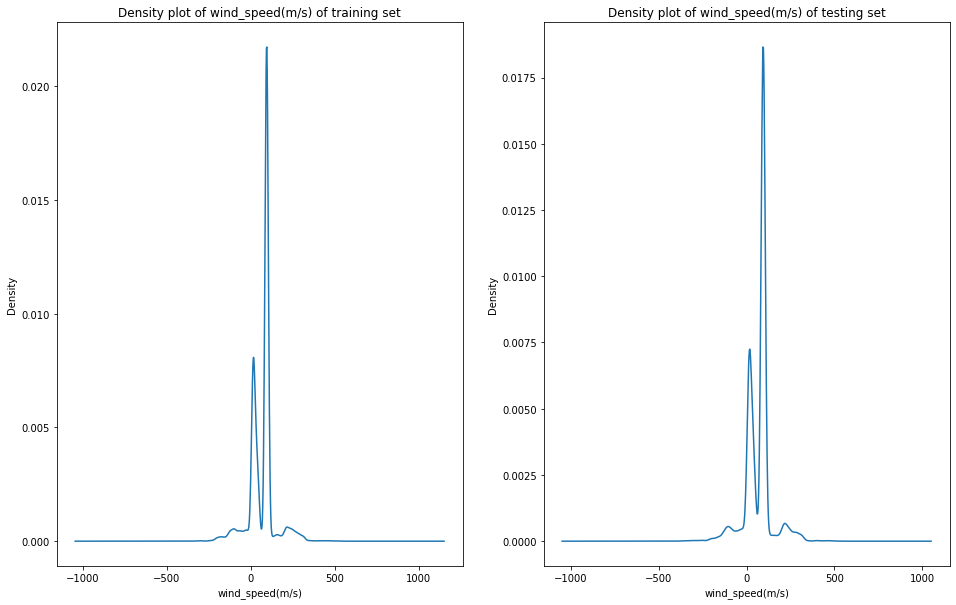

In [91]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'wind_speed(m/s)')
## Distribution of Feature wind_speed(m/s) of training and testing dataset are very similar

<AxesSubplot:xlabel='wind_speed(m/s)', ylabel='windmill_generated_power(kW/h)'>

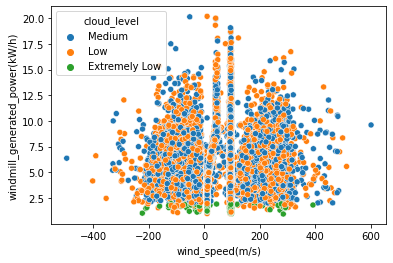

In [92]:
sns.scatterplot(x='wind_speed(m/s)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


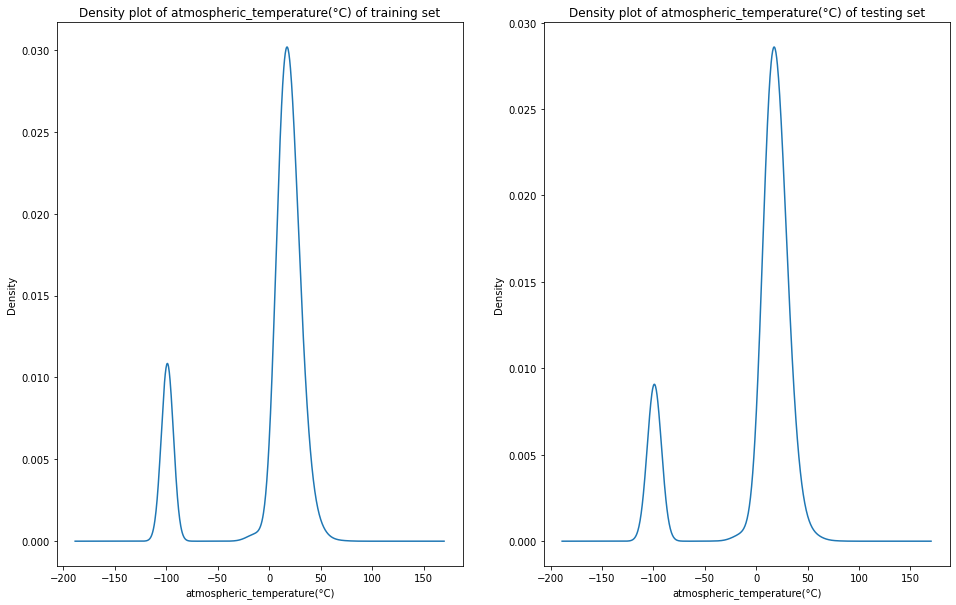

In [93]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'atmospheric_temperature(°C)')
## Distribution of Feature "atmospheric_temperature(°C)" of training and testing dataset is very similar

<AxesSubplot:xlabel='atmospheric_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

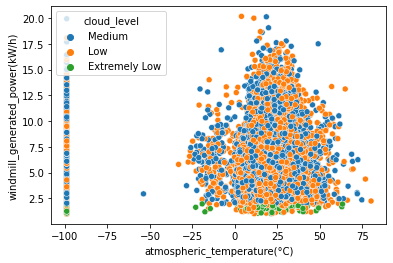

In [94]:
sns.scatterplot(x='atmospheric_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


From the above density plot of feature "atmospheric_temperature(°C)", we find that the distribution of "atmospheric_temperature(°C)" is almost same in training and testing dataset, so we need not changing anything in it.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


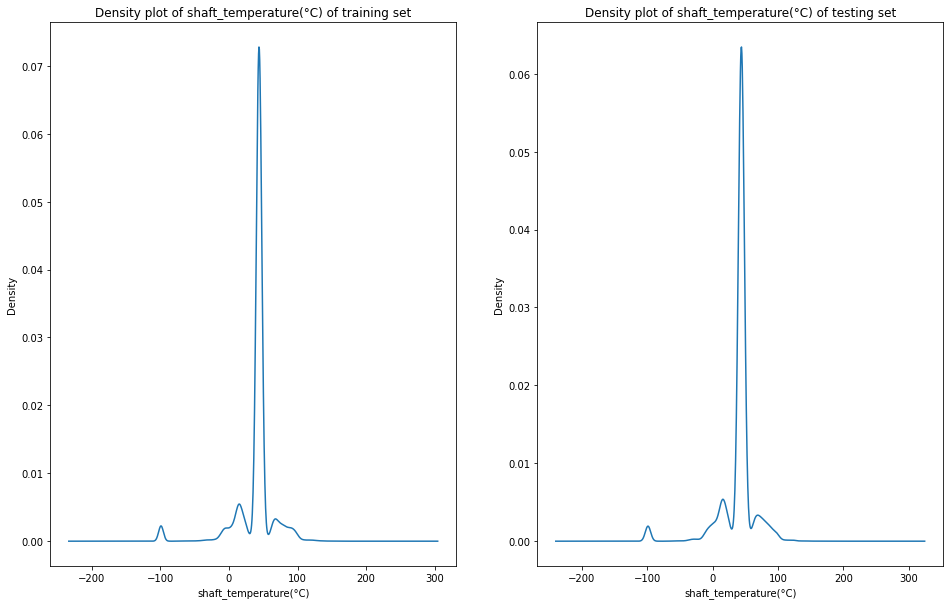

In [95]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'shaft_temperature(°C)')
## Distribution of Feature "shaft_temperature(°C)" of training and testing dataset are almost same

<AxesSubplot:xlabel='shaft_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

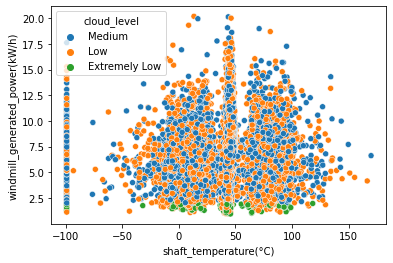

In [96]:
sns.scatterplot(x='shaft_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


From the above density plot of feature "shaft_temperature(°C)", we find that the distribution of "shaft_temperature(°C)" is almost same in training and testing dataset, so we need not changing anything in it.



/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


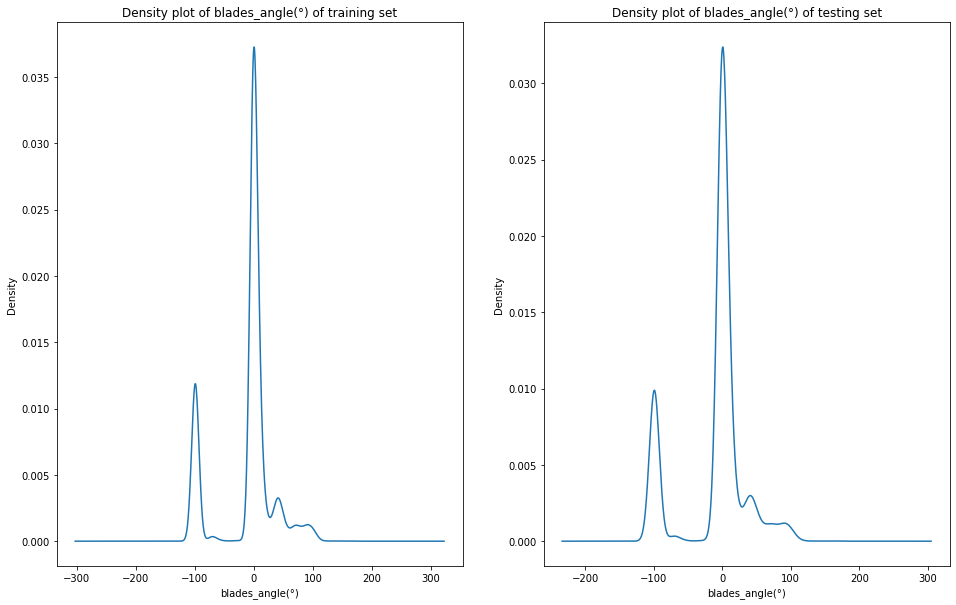

In [97]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'blades_angle(°)')
## Distribution of Feature "blades_angle(°)" of training and testing dataset are almost same

From the above density plot of feature "blades_angle(°)", we found that the distribution of "blades_angle(°)" is almost same in training and testing dataset, so we are not changing anything in it.




<AxesSubplot:xlabel='gearbox_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

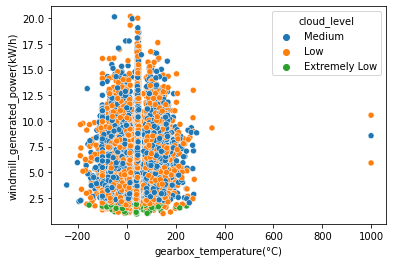

In [98]:
sns.scatterplot(x='gearbox_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


In [105]:
## Here we are removing extreme outliers which are present in a very less number
low = df_cpy['gearbox_temperature(°C)'] < -200
high = df_cpy['gearbox_temperature(°C)'] > 300
low = np.where(low)
high = np.where(high)
df_cpy.drop(low[0],inplace=True)
df_cpy.drop(high[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

<AxesSubplot:xlabel='area_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

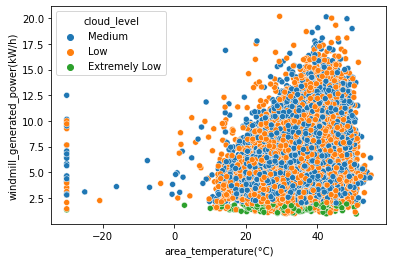

In [106]:
sns.scatterplot(x='area_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


In [109]:
## Droping extreme outliers
low = df_cpy['area_temperature(°C)'] < 10
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

<AxesSubplot:xlabel='engine_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

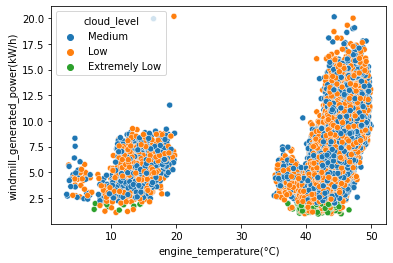

In [111]:
sns.scatterplot(x='engine_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [112]:
## Dropping extreme outliers
low = df_cpy['engine_temperature(°C)'] < 38
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

<AxesSubplot:xlabel='blade_length(m)', ylabel='windmill_generated_power(kW/h)'>

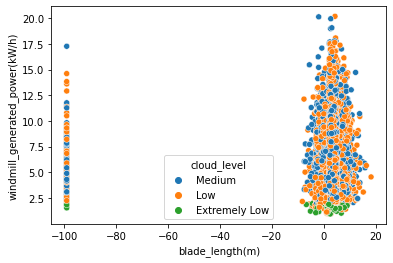

In [114]:
sns.scatterplot(x='blade_length(m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [115]:
## Removing extreme outliers
low = df_cpy['blade_length(m)'] < -20
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

Now we have removed all the outliers and also analysed the distribution between train and test dataset

# Data preparation

In [116]:
df_cpy.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)
df_test.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)

In [117]:
df_cpy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26561 entries, 0 to 26560
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     26561 non-null  object 
 1   datetime                        26561 non-null  object 
 2   wind_speed(m/s)                 26304 non-null  float64
 3   atmospheric_temperature(°C)     23329 non-null  float64
 4   shaft_temperature(°C)           26559 non-null  float64
 5   blades_angle(°)                 26361 non-null  float64
 6   gearbox_temperature(°C)         26560 non-null  float64
 7   engine_temperature(°C)          26560 non-null  float64
 8   motor_torque(N-m)               26553 non-null  float64
 9   atmospheric_pressure(Pascal)    24035 non-null  float64
 10  area_temperature(°C)            26561 non-null  float64
 11  wind_direction(°)               21601 non-null  float64
 12  resistance(ohm)                 

Since, there are missing values in testing data as well so we have to make arrangments for them and therefore replacing the missing values using statistical tools like mean, median and mode



In [119]:
df_cpy['gearbox_temperature(°C)'].fillna(df_cpy['gearbox_temperature(°C)'].mean(),inplace=True)
df_cpy['area_temperature(°C)'].fillna(df_cpy['area_temperature(°C)'].mean(),inplace=True)
df_cpy['rotor_torque(N-m)'].fillna(df_cpy['rotor_torque(N-m)'].mean(),inplace=True)
df_cpy['blade_length(m)'].fillna(df_cpy['blade_length(m)'].mean(),inplace=True)
df_cpy['blade_breadth(m)'].fillna(df_cpy['blade_breadth(m)'].mean(),inplace=True)
df_cpy['windmill_height(m)'].fillna(df_cpy['windmill_height(m)'].mean(),inplace=True)
df_cpy['cloud_level'].fillna(df_cpy['cloud_level'].mode()[0],inplace=True)
df_cpy['atmospheric_temperature(°C)'].fillna(df_cpy['atmospheric_temperature(°C)'].mean(),inplace=True)
df_cpy['atmospheric_pressure(Pascal)'].fillna(df_cpy['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_cpy['wind_speed(m/s)'].fillna(df_cpy['wind_speed(m/s)'].mean(),inplace=True)
df_cpy['shaft_temperature(°C)'].fillna(df_cpy['shaft_temperature(°C)'].mean(),inplace=True)
df_cpy['blades_angle(°)'].fillna(df_cpy['blades_angle(°)'].mean(),inplace=True)
df_cpy['engine_temperature(°C)'].fillna(df_cpy['engine_temperature(°C)'].mean(),inplace=True)
df_cpy['motor_torque(N-m)'].fillna(df_cpy['motor_torque(N-m)'].mean(),inplace=True)
df_cpy['wind_direction(°)'].fillna(df_cpy['wind_direction(°)'].mean(),inplace=True)

In [121]:
df_test['gearbox_temperature(°C)'].fillna(df_test['gearbox_temperature(°C)'].mean(),inplace=True)
df_test['area_temperature(°C)'].fillna(df_test['area_temperature(°C)'].mean(),inplace=True)
df_test['rotor_torque(N-m)'].fillna(df_test['rotor_torque(N-m)'].mean(),inplace=True)
df_test['blade_length(m)'].fillna(df_test['blade_length(m)'].mean(),inplace=True)
df_test['blade_breadth(m)'].fillna(df_test['blade_breadth(m)'].mean(),inplace=True)
df_test['windmill_height(m)'].fillna(df_test['windmill_height(m)'].mean(),inplace=True)
df_test['cloud_level'].fillna(df_test['cloud_level'].mode()[0],inplace=True)
df_test['atmospheric_temperature(°C)'].fillna(df_test['atmospheric_temperature(°C)'].mean(),inplace=True)
df_test['atmospheric_pressure(Pascal)'].fillna(df_test['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_test['wind_speed(m/s)'].fillna(df_test['wind_speed(m/s)'].mean(),inplace=True)
df_test['shaft_temperature(°C)'].fillna(df_test['shaft_temperature(°C)'].mean(),inplace=True)
df_test['blades_angle(°)'].fillna(df_test['blades_angle(°)'].mean(),inplace=True)
df_test['engine_temperature(°C)'].fillna(df_test['engine_temperature(°C)'].mean(),inplace=True)
df_test['motor_torque(N-m)'].fillna(df_test['motor_torque(N-m)'].mean(),inplace=True)
df_test['wind_direction(°)'].fillna(df_test['wind_direction(°)'].mean(),inplace=True)


In [122]:
df_cpy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26561 entries, 0 to 26560
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     26561 non-null  object 
 1   datetime                        26561 non-null  object 
 2   wind_speed(m/s)                 26561 non-null  float64
 3   atmospheric_temperature(°C)     26561 non-null  float64
 4   shaft_temperature(°C)           26561 non-null  float64
 5   blades_angle(°)                 26561 non-null  float64
 6   gearbox_temperature(°C)         26561 non-null  float64
 7   engine_temperature(°C)          26561 non-null  float64
 8   motor_torque(N-m)               26561 non-null  float64
 9   atmospheric_pressure(Pascal)    26561 non-null  float64
 10  area_temperature(°C)            26561 non-null  float64
 11  wind_direction(°)               26561 non-null  float64
 12  resistance(ohm)                 

In [124]:
df_cpy.dropna(how='any',axis=0,inplace=True)


In [126]:
df_cpy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24719 entries, 0 to 26560
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     24719 non-null  object 
 1   datetime                        24719 non-null  object 
 2   wind_speed(m/s)                 24719 non-null  float64
 3   atmospheric_temperature(°C)     24719 non-null  float64
 4   shaft_temperature(°C)           24719 non-null  float64
 5   blades_angle(°)                 24719 non-null  float64
 6   gearbox_temperature(°C)         24719 non-null  float64
 7   engine_temperature(°C)          24719 non-null  float64
 8   motor_torque(N-m)               24719 non-null  float64
 9   atmospheric_pressure(Pascal)    24719 non-null  float64
 10  area_temperature(°C)            24719 non-null  float64
 11  wind_direction(°)               24719 non-null  float64
 12  resistance(ohm)                 

In [127]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tracking_id                   12086 non-null  object 
 1   datetime                      12086 non-null  object 
 2   wind_speed(m/s)               12086 non-null  float64
 3   atmospheric_temperature(°C)   12086 non-null  float64
 4   shaft_temperature(°C)         12086 non-null  float64
 5   blades_angle(°)               12086 non-null  float64
 6   gearbox_temperature(°C)       12086 non-null  float64
 7   engine_temperature(°C)        12086 non-null  float64
 8   motor_torque(N-m)             12086 non-null  float64
 9   atmospheric_pressure(Pascal)  12086 non-null  float64
 10  area_temperature(°C)          12086 non-null  float64
 11  wind_direction(°)             12086 non-null  float64
 12  resistance(ohm)               12086 non-null  float64
 13  r

In [128]:
## Feature "cloud_level" is categorical with 3 unique values
df_cpy['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)
df_test['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)

In [129]:
df_cpy['turbine_status'].value_counts()


AAA    1819
A      1815
B2     1813
BB     1799
BCB    1795
D      1780
B      1752
AC     1749
ABC    1745
A2     1745
AB     1740
BA     1733
BD     1724
BBB    1710
Name: turbine_status, dtype: int64

In [130]:
## Using dummy variables for feature "turbine_status"
dum = ['turbine_status']
df_dum = pd.get_dummies(df_cpy[dum])
df_test_dum = pd.get_dummies(df_test[dum])
df_dum

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26556,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26557,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26558,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26559,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [131]:
df_cpy = pd.concat([df_cpy,df_dum],axis=1)
df_test = pd.concat([df_test,df_test_dum],axis=1)

In [132]:
## Converting the feature "datetime" into pandas datetime format
df_cpy['datetime'] = pd.to_datetime(df_cpy['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

# Data modelling

In [133]:
X = df_cpy.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis=1)
Y = df_cpy['windmill_generated_power(kW/h)']
X_test = df_test.drop(['tracking_id','datetime','turbine_status'],axis=1)
print(X.shape,Y.shape)
print(X_test.shape)

(24719, 30) (24719,)
(12086, 30)


In [135]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(19775, 30) (19775,)
(4944, 30) (4944,)


Linear Regression


In [143]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.4927802675404349
0.5040433560047402


ExtraTreesRegressor

In [145]:
from sklearn.ensemble import ExtraTreesRegressor
extra_model = ExtraTreesRegressor(criterion='mse', random_state=0, n_jobs=-1, 
                                min_samples_leaf=1, max_depth=20, 
                                min_samples_split=3, n_estimators=1000
                               )

extra_model.fit(x_train, y_train)

# predict
y_train_pred = extra_model.predict(x_train)
y_test_pred = extra_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9963317715930321
0.9539971318685571


XGBRegressor

In [147]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(x_train,y_train)
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9897072146483358
0.9672322476154211


# Test Evaluation and Submission

In [148]:
df_test= pd.read_csv(r"/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/test_data.csv")

In [149]:
df_sub = df_test[['tracking_id','datetime']]


In [151]:
results = xgb.predict(X_test)


In [152]:
results


array([ 2.5359125,  2.4157124,  3.343713 , ...,  4.8505635,  5.4818287,
       10.456907 ], dtype=float32)

In [153]:
df_sub['windmill_generated_power(kW/h)'] = results


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
df_sub.to_csv('./predictions.csv',header=True,index=False)
df_sub


,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.535913
1,WM_18723,2019-03-30 07:43:20,2.415712
2,WM_34552,2019-08-10 11:33:20,3.343713
3,WM_28570,2019-06-26 03:53:20,8.517702
4,WM_36934,2019-08-27 16:43:20,3.604487
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.734378
12082,WM_1630,2018-11-12 17:33:20,3.153716
12083,WM_24703,2019-05-27 11:53:20,4.850564
12084,WM_22893,2019-05-13 21:53:20,5.481829


Thank you, contact sandur43@gmail.com for queries